In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import random

## Problem 1 (GalaxyZoo/Classify)

Galaxy classification is done by volunteers online via the online platform Zooniverse. 

## Problem 2 (Willett et al. 2013)

Willett et al. 2013: https://arxiv.org/abs/1308.3496 



-304,122 galaxies in GZ2

-'The goal was to in- clude only the nearest, brightest, and largest systems for which fine morphological features can be resolved and classified.' (cuts in section 2.1)

-$m_r$ > 17

-each image is 424 × 424 pixels scaled to (0.02×petroR90_r) arcsec per pixel, 42.4 arcseconds (http://skyserver.sdss.org/dr7/en/help/docs/algorithm.asp?key=mag_petro)

-decision tree is used, 'The GZ2 tree has 11 classification tasks with a total of 37 possible responses'

-GZ1 section 3.3 no debiasing and no decision tree

-section 2.4 (site history) 'For most of the duration of GZ2, images shown to classifiers were randomly selected from the database. To ensure that each galaxy ultimately had enough responses to accurately characterize the likelihood of the classification, images with low numbers of classifications were shown at a higher rate toward the end of the project'

-unreliable classifications -> section 3.2 individual user weighting 

-3.3 classification bias -> 'the presumed cause is that more distant galaxies, on average, are both smaller and dimmer in the cutout images. As a result, finer morphologi- cal features are more difficult to identify'



## Problem 3 (Conselice, 2014)


Conselice, 2014: https://arxiv.org/abs/1403.2783

-morphological classification infers galaxy evolution



## Problem 4 (Lotz et al., 2011,  Rodriguez-Gomez et al, 2015)

Rodriguez-Gomez et al, 2015: https://arxiv.org/abs/1502.01339

Lotz et al., 2011: https://arxiv.org/abs/1108.2508


-rodrigues-gomez "..it is important to quantify the galaxy-galaxy merger rate, namely, the frequency of galaxy mergers as a function of the masses of the objects involved, redshift, and possibly other parameters such as gas fractions. A precise determination of this quantity is of fundamental interest for understanding the growth and assembly of galaxies, for bringing galaxy formation models into agreement with the observed distribution of galaxy morphologies.."

## Problem 5 (opening training set and test set)

In [2]:
import tarfile

#file_train = tarfile.open('training_images.tar.gz')
#file_test = tarfile.open('test_images.tar.gz')

In [3]:
#file_train.extractall('./training_images')
#file_test.extractall('./test_images')

In [4]:
#file_test.close()
#file_train.close()

In [5]:
class Labels:
    
    def __init__(self, filename):
        self.filename = filename
        self.df = pd.read_csv(self.filename)
        self.galaxyids = list(self.df['GalaxyID'])
    
    def get_df(self):
        #return pandas dataframe
        
        return self.df   
    
    
    def get_label_vector(self, galaxyid):
        #return label vector given galaxyID
        
        index = self.galaxyids.index(galaxyid)
        
        #normalize?? 
        #un_labels = np.array(self.df.iloc[index][1:])
        
        
             
        return np.array(self.df.iloc[index][1:])
    
    def get_galaxyids(self):
        
        return self.galaxyids

In [6]:
labels_train = Labels('training_classifications.csv')

In [7]:
training_labels_df = labels_train.get_df()
training_labels_df

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [8]:
labels_train.get_label_vector(999950)

array([0.901216  , 0.098784  , 0.        , 0.        , 0.098784  ,
       0.        , 0.098784  , 0.        , 0.098784  , 0.        ,
       0.04537811, 0.05340589, 0.        , 0.127644  , 0.872356  ,
       0.40484065, 0.49637535, 0.        , 0.        , 0.        ,
       0.02132051, 0.        , 0.06209472, 0.04422877, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

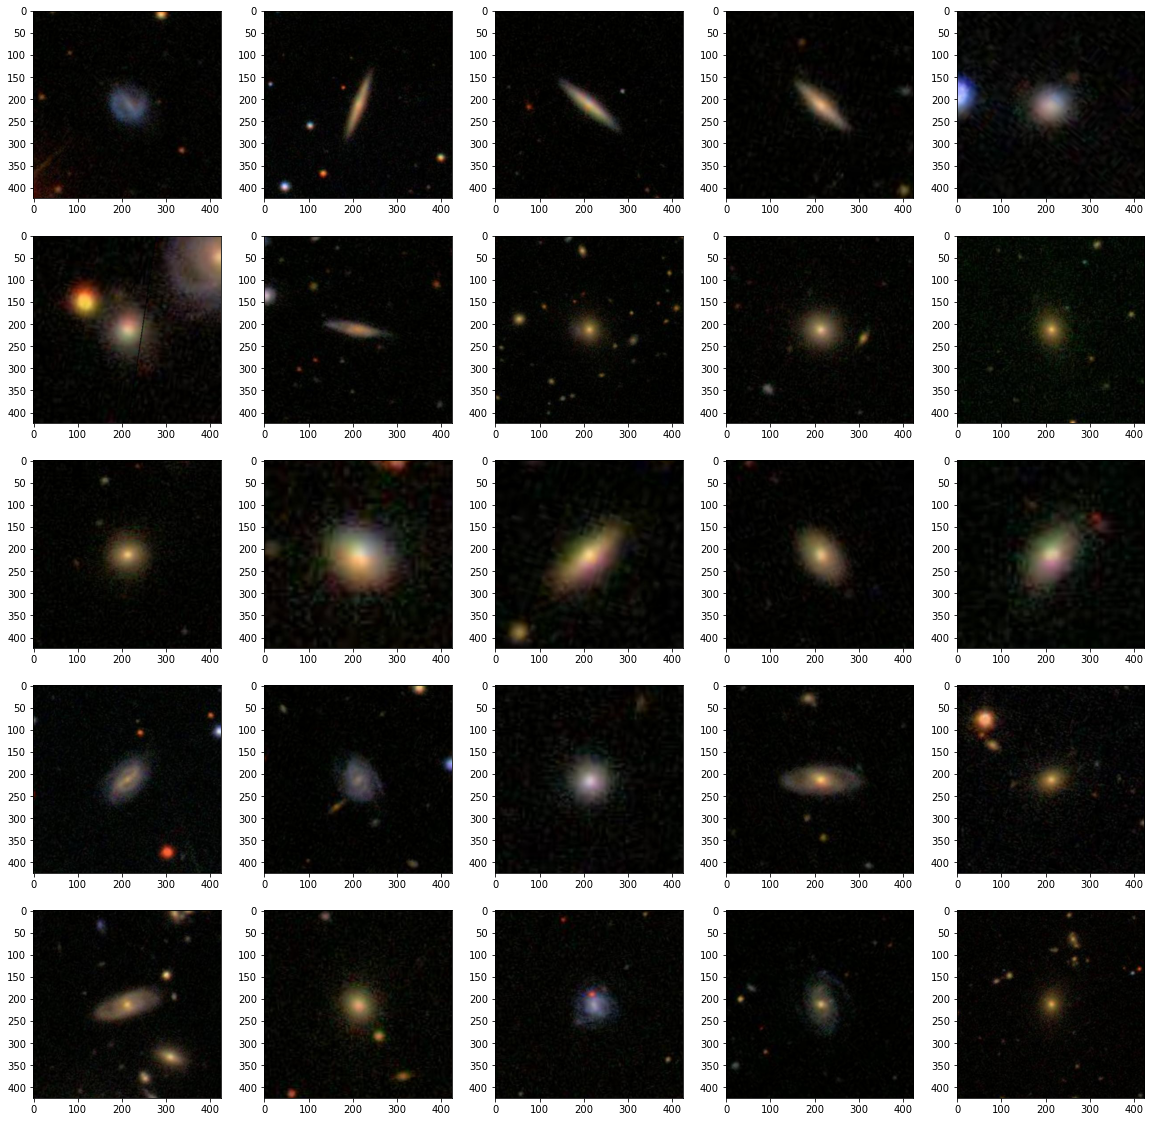

In [9]:
#plot 25 random images

fig, axs = plt.subplots(5, 5)
fig.set_size_inches(20, 20)

for i in range(5):
    for j in range(5):
        random_index = random.randint(0,len(training_labels_df)-1)
        galaxy_id = str(training_labels_df['GalaxyID'][random_index])

        file_name = 'training_images/training_images/' + galaxy_id + '.jpg'

        img = mpimg.imread(file_name)
        imgplot = axs[i, j].imshow(img)
        #axs[i,j].imshow(img)



## Problem 6 (histogram of labels)

buh
buh
buh


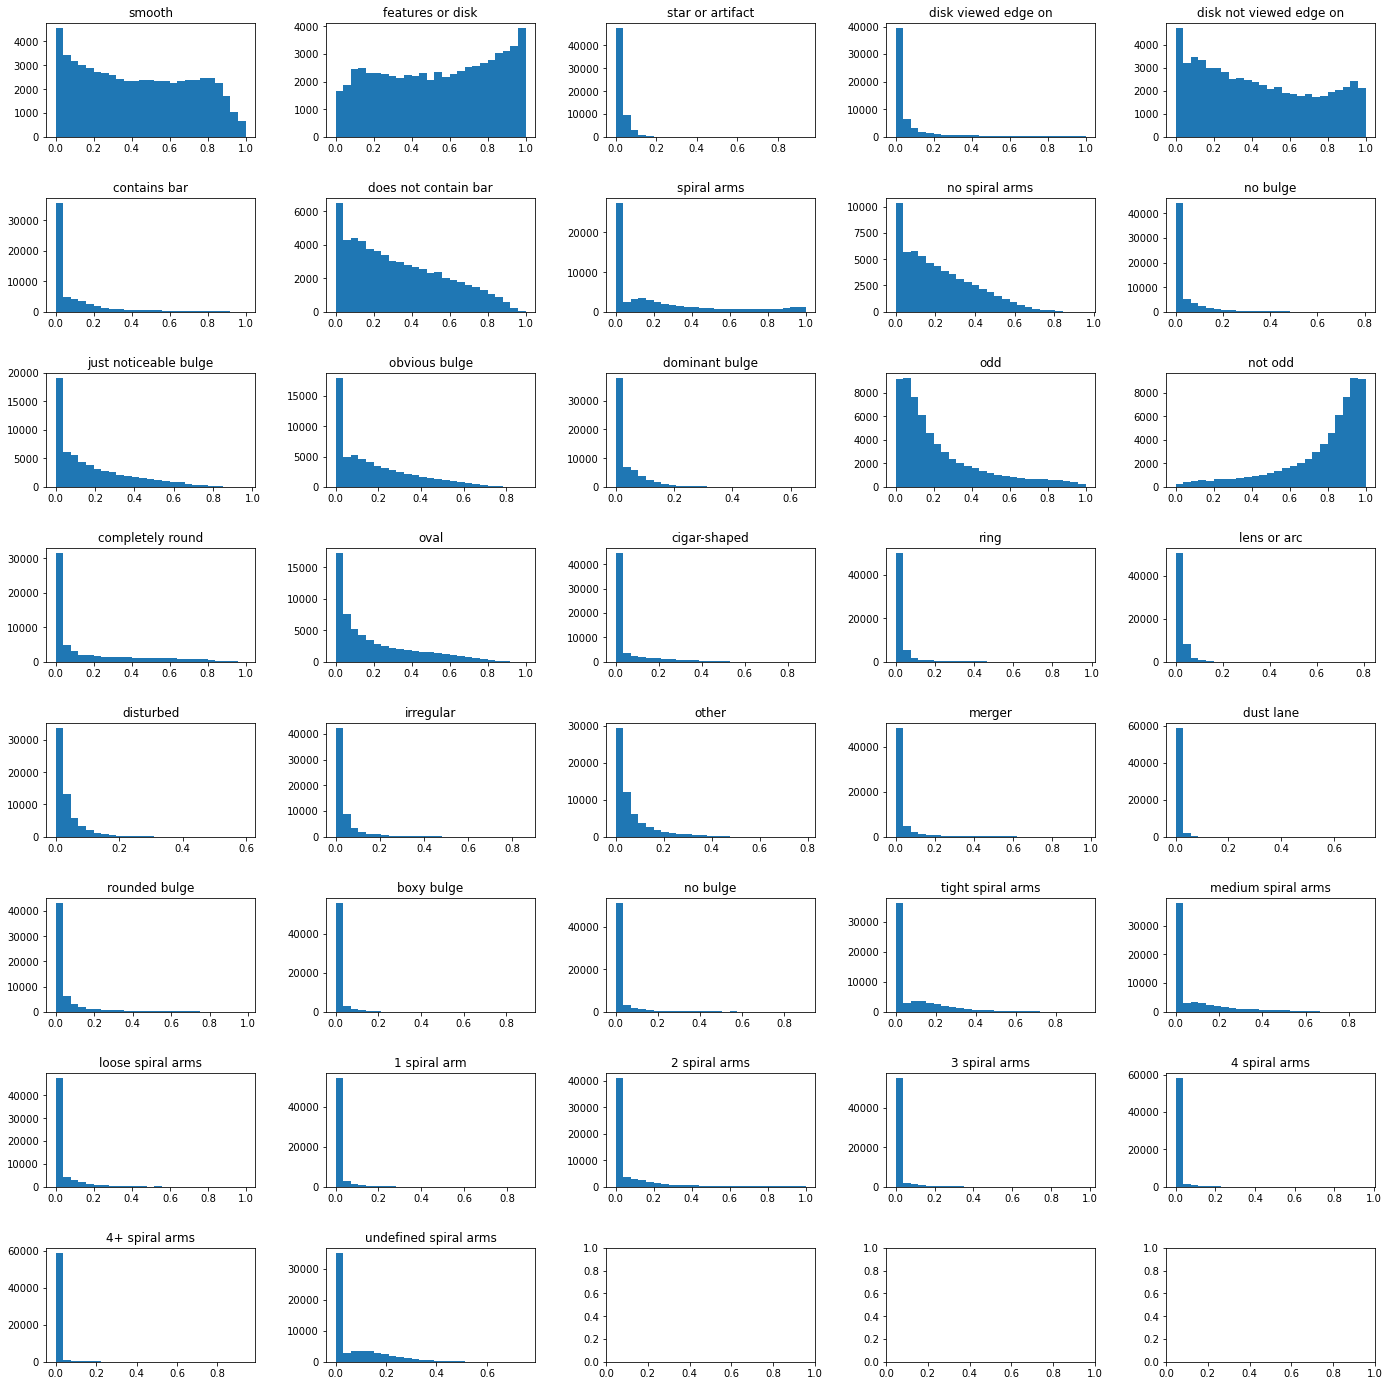

In [10]:
first_class = ['smooth', 'features or disk', 'star or artifact']
second_class = ['disk viewed edge on', 'disk not viewed edge on']
third_class = ['contains bar', 'does not contain bar']
fourth_class = ['spiral arms', 'no spiral arms']
fifth_class = ['no bulge', 'just noticeable bulge', 'obvious bulge', 'dominant bulge']
sixth_class = ['odd', 'not odd']
seventh_class = ['completely round', 'oval', 'cigar-shaped']
eighth_class = ['ring', 'lens or arc', 'disturbed', 'irregular', 'other', 'merger', 'dust lane']
ninth_class = ['rounded bulge', 'boxy bulge', 'no bulge']
tenth_class = ['tight spiral arms', 'medium spiral arms', 'loose spiral arms']
eleventh_class = ['1 spiral arm', '2 spiral arms', '3 spiral arms', '4 spiral arms', '4+ spiral arms', 'undefined spiral arms']

classes = first_class+second_class+third_class+fourth_class+fifth_class+sixth_class+seventh_class+eighth_class+ninth_class+tenth_class+eleventh_class

#implement axes subplots 

fig, axs = plt.subplots(8, 5)
fig.set_size_inches(20, 20)
fig.tight_layout(pad=4.0)

k = 0
for i in range(8):
    for j in range(5):
        try:
            axs[i,j].hist(training_labels_df[training_labels_df.columns[1:][k]], bins = 25)
            axs[i,j].set_title(classes[k])

            k += 1
        except:
            print('buh')
        

## Problem 7 (prototype)

buh
buh
buh


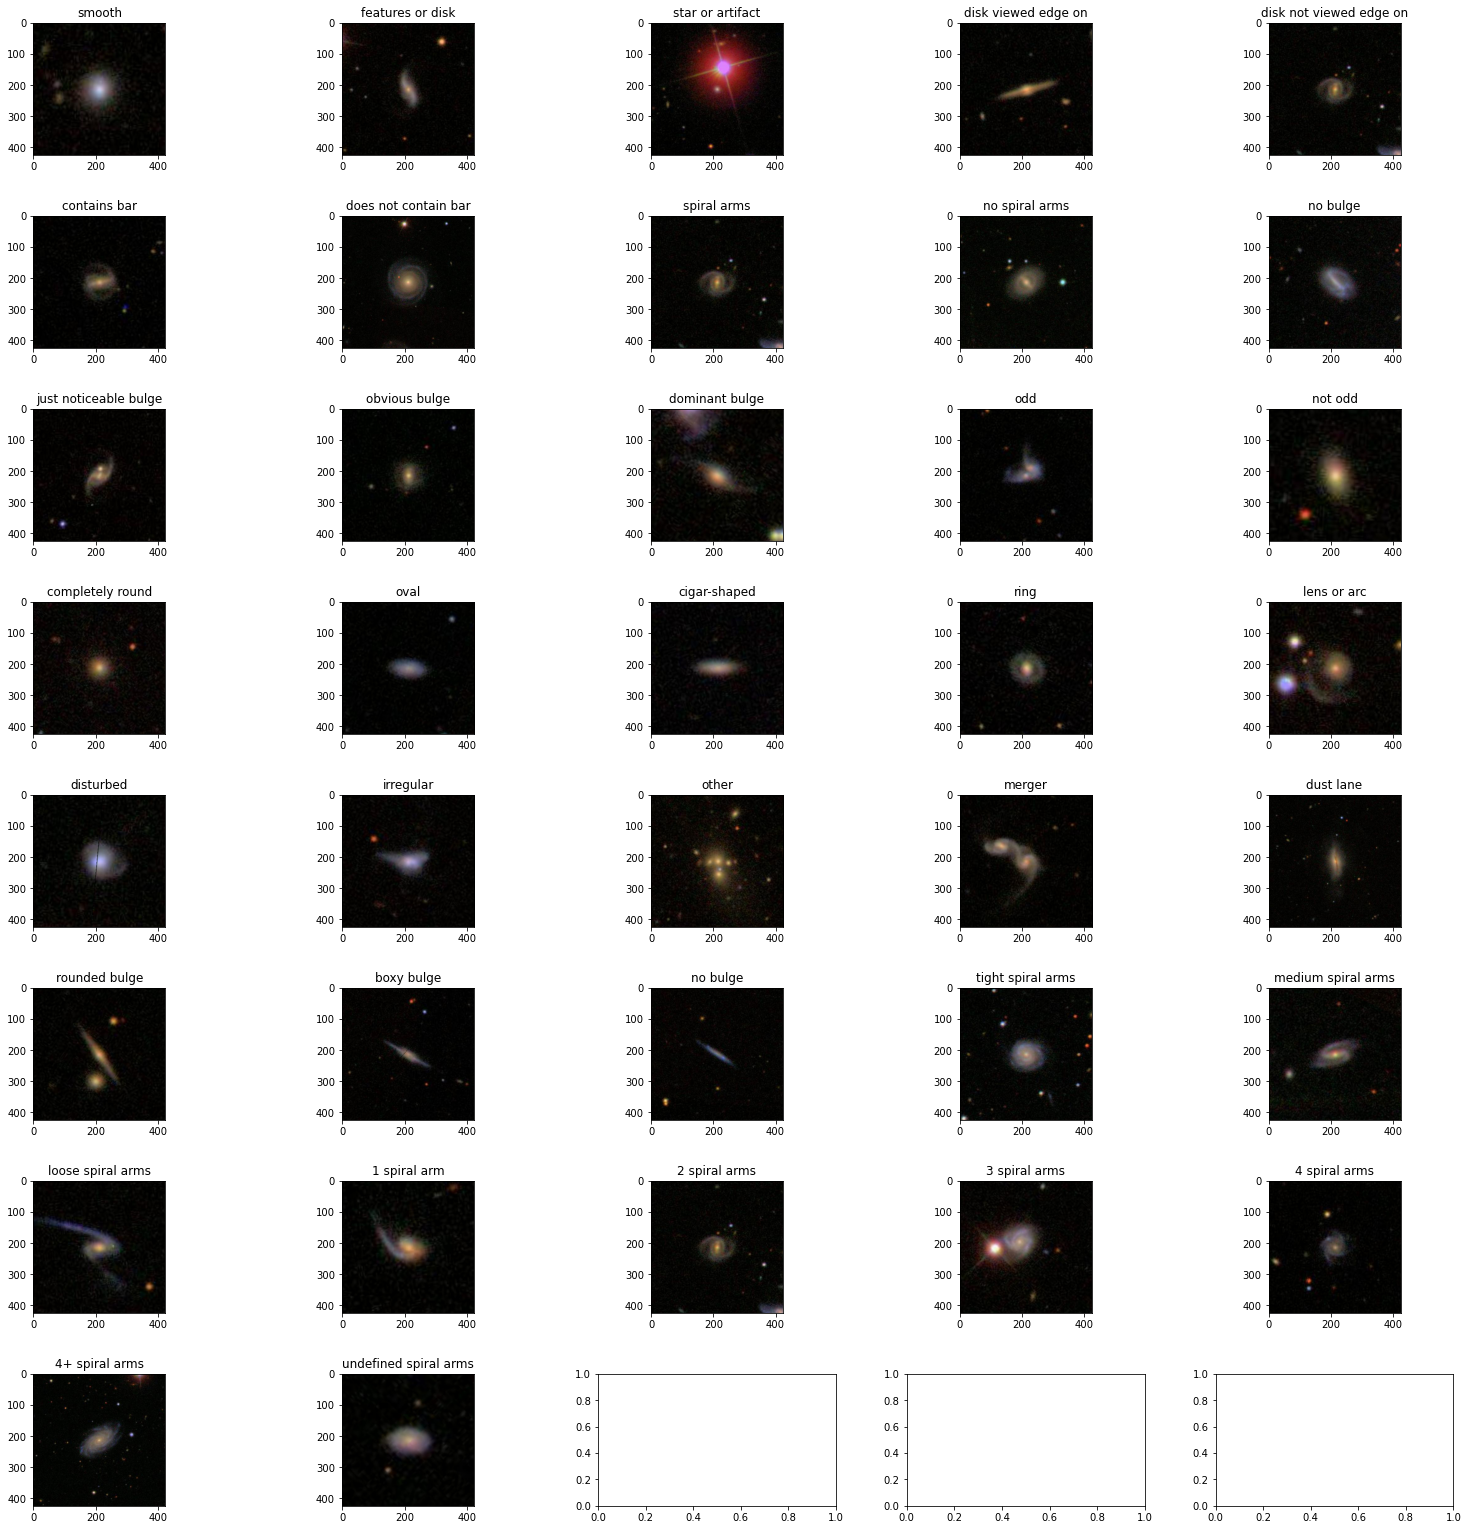

In [11]:
def plot_prototype(label, title):
    galaxy_id = str(training_labels_df['GalaxyID'][np.argmax(training_labels_df[label])])
    file_name = 'training_images/training_images/' + galaxy_id + '.jpg'
    img = mpimg.imread(file_name)
    #imgplot = plt.imshow(img)
    #plt.title(title)
    #plt.show()
    
    return img
    

'''i = 0
for training_label in training_labels_df.columns[1:]:
    plot_prototype(training_label, classes[i])
    i += 1'''
    
fig, axs = plt.subplots(8, 5)
fig.set_size_inches(22, 22)
fig.tight_layout(pad=4.0)

k = 0

for i in range(8):
    for j in range(5):
        try:
            axs[i,j].imshow(plot_prototype(training_labels_df.columns[1:][k], classes[k]))
            axs[i,j].set_title(classes[k])
            k += 1
        except:
            print('buh')


## Problem 8 (correlation matrix)

In [12]:
def correlation_matrix_element(class_i, class_j):
    i = np.array(training_labels_df[class_i])
    j = np.array(training_labels_df[class_j])
    
    num = np.mean(np.dot(i, j)) - np.mean(i)*np.mean(j)
    denom = np.sqrt(np.mean(np.dot(i,i)) - np.mean(i)**2) * np.sqrt(np.mean(np.dot(j,j)) - np.mean(j)**2)
    
    p_ij = num/denom
    
    return p_ij


correlation_matrix = []

for training_label_i in training_labels_df.columns[1:]:
    
    correlation_matrix_row = []
    
    for training_label_j in training_labels_df.columns[1:]:
        
        p_ij = correlation_matrix_element(training_label_i, training_label_j)
        correlation_matrix_row.append(p_ij)
        
    correlation_matrix.append(correlation_matrix_row)

correlation_matrix = np.array(correlation_matrix)

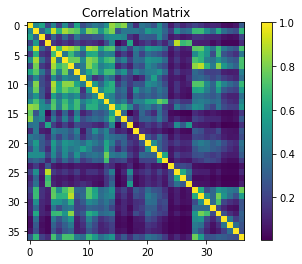

In [13]:
plt.figure()
plt.title('Correlation Matrix')
plt.imshow(correlation_matrix)
plt.colorbar()

## Problem 9 (correlation sub-matrices)

Text(0.5, 1.0, 'Class 11')

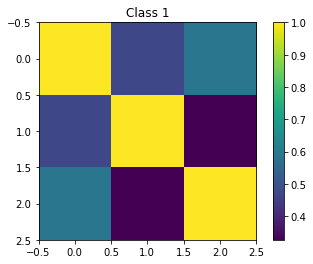

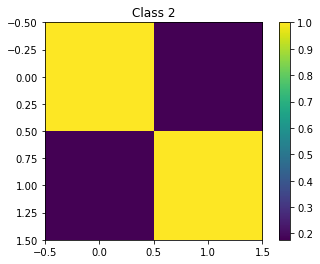

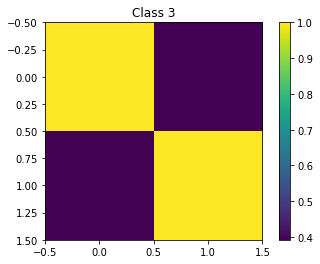

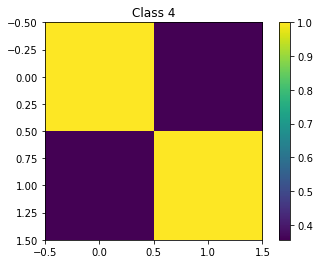

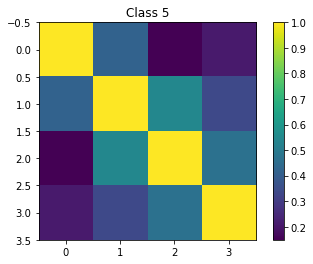

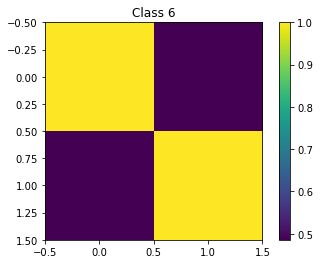

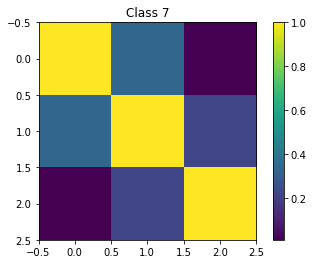

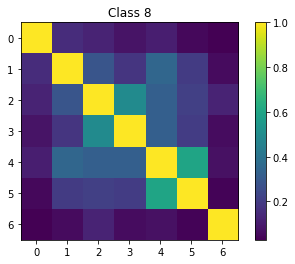

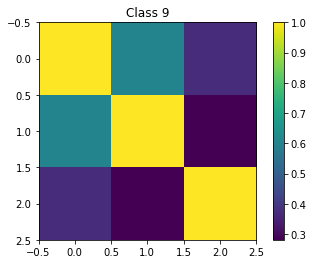

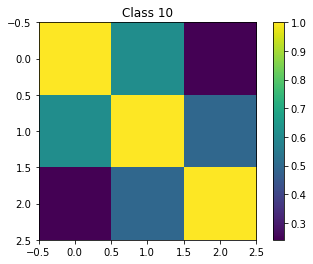

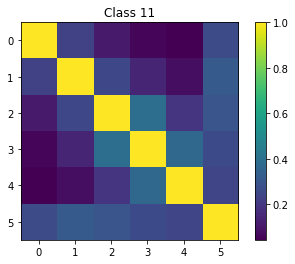

In [14]:
#class 1 
plt.figure()
plt.imshow(correlation_matrix[0:3,0:3])
plt.colorbar()
plt.title('Class 1')

#class 2 
plt.figure()
plt.imshow(correlation_matrix[3:5,3:5])
plt.colorbar()
plt.title('Class 2')

#class 3 
plt.figure()
plt.imshow(correlation_matrix[5:7,5:7])
plt.colorbar()
plt.title('Class 3')

#class 4 
plt.figure()
plt.imshow(correlation_matrix[7:9,7:9])
plt.colorbar()
plt.title('Class 4')

#class 5 
plt.figure()
plt.imshow(correlation_matrix[9:13,9:13])
plt.colorbar()
plt.title('Class 5')

#class 6 
plt.figure()
plt.imshow(correlation_matrix[13:15,13:15])
plt.colorbar()
plt.title('Class 6')

#class 7 
plt.figure()
plt.imshow(correlation_matrix[15:18,15:18])
plt.colorbar()
plt.title('Class 7')

#class 8 
plt.figure()
plt.imshow(correlation_matrix[18:25,18:25])
plt.colorbar()
plt.title('Class 8')

#class 9 
plt.figure()
plt.imshow(correlation_matrix[25:28,25:28])
plt.colorbar()
plt.title('Class 9')

#class 10 
plt.figure()
plt.imshow(correlation_matrix[28:31,28:31])
plt.colorbar()
plt.title('Class 10')

#class 11
plt.figure()
plt.imshow(correlation_matrix[31:37,31:37])
plt.colorbar()
plt.title('Class 11')

## Problem 10 (minimum memory to load image into memory)

single image: 144 bytes
total: 8.867232 MB


(424, 424, 3)

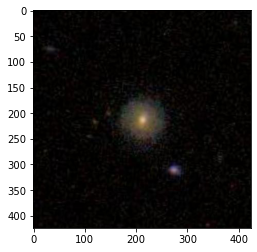

In [15]:
import sys

random_index = random.randint(0,len(training_labels_df)-1)
galaxy_id = str(training_labels_df['GalaxyID'][random_index])
file_name = 'training_images/training_images/' + galaxy_id + '.jpg'
img = mpimg.imread(file_name)

plt.imshow(img)

print('single image:', sys.getsizeof(img), 'bytes')

#calculate total memory

print('total:', len(training_labels_df)*144 / 1e6, 'MB')

np.shape(img)

## Problem 11 (downsizing images)

539472 uint8 (424, 424, 3)
14016 uint8 (68, 68, 3)


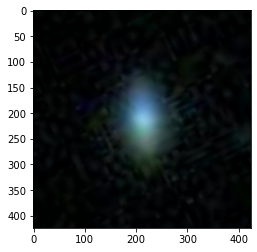

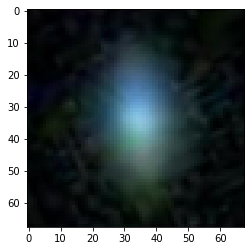

In [16]:
import cv2 

#testing downsizing procedure

galaxy_id = str(training_labels_df['GalaxyID'][np.argmax(training_labels_df['Class4.2'])])

random_index = random.randint(0,len(training_labels_df)-1)
galaxy_id = str(training_labels_df['GalaxyID'][random_index])

#random_index = random.randint(0,len(training_labels_df)-1)
#galaxy_id = str(training_labels_df['GalaxyID'][random_index])
file_name = 'training_images/training_images/' + galaxy_id + '.jpg'

img1 = np.array(cv2.imread(file_name))
img1_d = np.array(cv2.imread(file_name)[90:334, 90:334])
img1_d = np.array(cv2.resize(img1_d, (0, 0), fx = 0.28, fy = 0.28))

plt.figure()
plt.imshow(img1)
print(sys.getsizeof(img1), img1.dtype, np.shape(img1))

plt.figure()
plt.imshow(img1_d)
print(sys.getsizeof(img1_d), img1_d.dtype, np.shape(img1_d))


def downsize_image(galaxy_id):
    file_name = 'training_images/training_images/' + galaxy_id + '.jpg'
    img1_d = np.array(cv2.imread(file_name)[90:334, 90:334])
    img1_d = np.array(cv2.resize(img1_d, (0, 0), fx = 0.28, fy = 0.28))
    
    return img1_d

## Problem 12+13 (generator function) (train/test split)

In [17]:
from sklearn.utils import shuffle
import os
import math

galaxyids = labels_train.get_galaxyids()
galaxyids_shuffle = shuffle(galaxyids, random_state = 0)

galaxyids_train = galaxyids_shuffle[0:math.floor(len(galaxyids)*0.8)]
galaxyids_test = galaxyids_shuffle[math.floor(len(galaxyids)*0.8):]


batch_size = 1

#testing generator functions

def generator_batches_train_1():
    
    n1 = 0
    n2 = batch_size
    
    while len(galaxyids_train[n1:n2]) != 0:
        
        img1_d_list = []
        label_vectors = []
        
        for i in galaxyids_train[n1:n2]:          
            img1_d_list.append(downsize_image(str(i)))
            label_vectors.append(labels_train.get_label_vector(i))
                  
        
        yield np.array(img1_d_list), np.array(label_vectors)
        
        n1+=batch_size
        n2+=batch_size
        
def generator_batches_test_1():
    n1 = 0
    n2 = batch_size
    
    while len(galaxyids_test[n1:n2]) != 0:
        
        img1_d_list = []
        label_vectors = []
        
        for i in galaxyids_test[n1:n2]:          
            img1_d_list.append(downsize_image(str(i)))
            label_vectors.append(labels_train.get_label_vector(i))
                  
        
        yield np.array(img1_d_list), np.array(label_vectors)
        
        n1+=batch_size
        n2+=batch_size


        
#save downsized_images

def generator_save_training():
           
    for i in galaxyids_train:          
        img1_d = downsize_image(str(i))
            
        np.save(os.path.join('downsized_train', f'{i}'), img1_d)
                  
        yield img1_d

def generator_save_test():
    
    for i in galaxyids_test:
        imd1_d = downsize_image(str(i))
        
        np.save(os.path.join('downsized_test', f'{i}'), img1_d)

        yield img1_d
        
'''mygenerator_save_training = generator_save_training()
mygenerator_save_test = generator_save_test()

for i in mygenerator_save_training:    
    img1_d = i

for i in mygenerator_save_test:
    img1_d = i'''

'mygenerator_save_training = generator_save_training()\nmygenerator_save_test = generator_save_test()\n\nfor i in mygenerator_save_training:    \n    img1_d = i\n\nfor i in mygenerator_save_test:\n    img1_d = i'

In [18]:
#histogram of training labels

label_matrix_train = []

for galaxyid_train in galaxyids_train:   
    label_matrix_train.append(labels_train.get_label_vector(galaxyid_train))

label_matrix_train = np.array(label_matrix_train)

buh
buh
buh


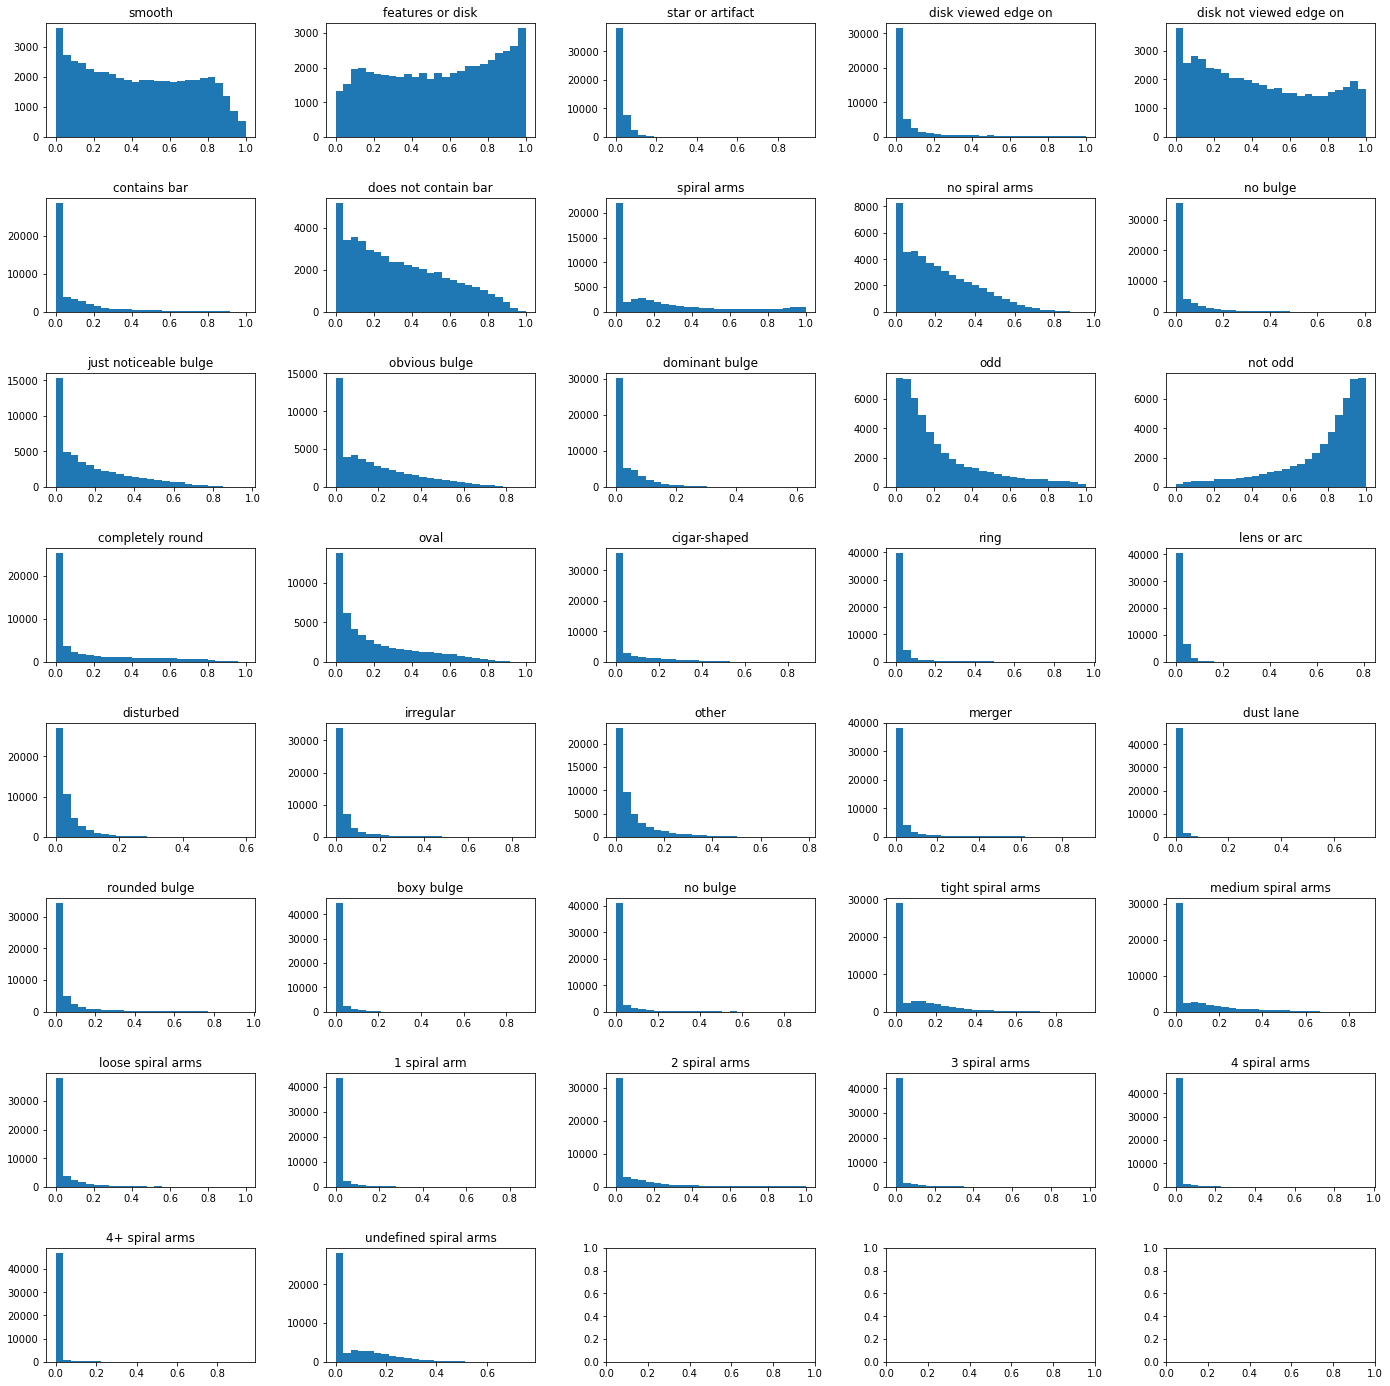

In [19]:
fig, axs = plt.subplots(8, 5)
fig.set_size_inches(20, 20)
fig.tight_layout(pad=4.0)

k = 0
for i in range(8):
    for j in range(5):
        try:
            axs[i,j].hist(label_matrix_train[:,k], bins = 25)
            axs[i,j].set_title(classes[k])

            k += 1
        except:
            print('buh')

In [20]:
#histogram of test labels

label_matrix_test = []

for galaxyid_test in galaxyids_test:   
    label_matrix_test.append(labels_train.get_label_vector(galaxyid_test))

label_matrix_test = np.array(label_matrix_test)

buh
buh
buh


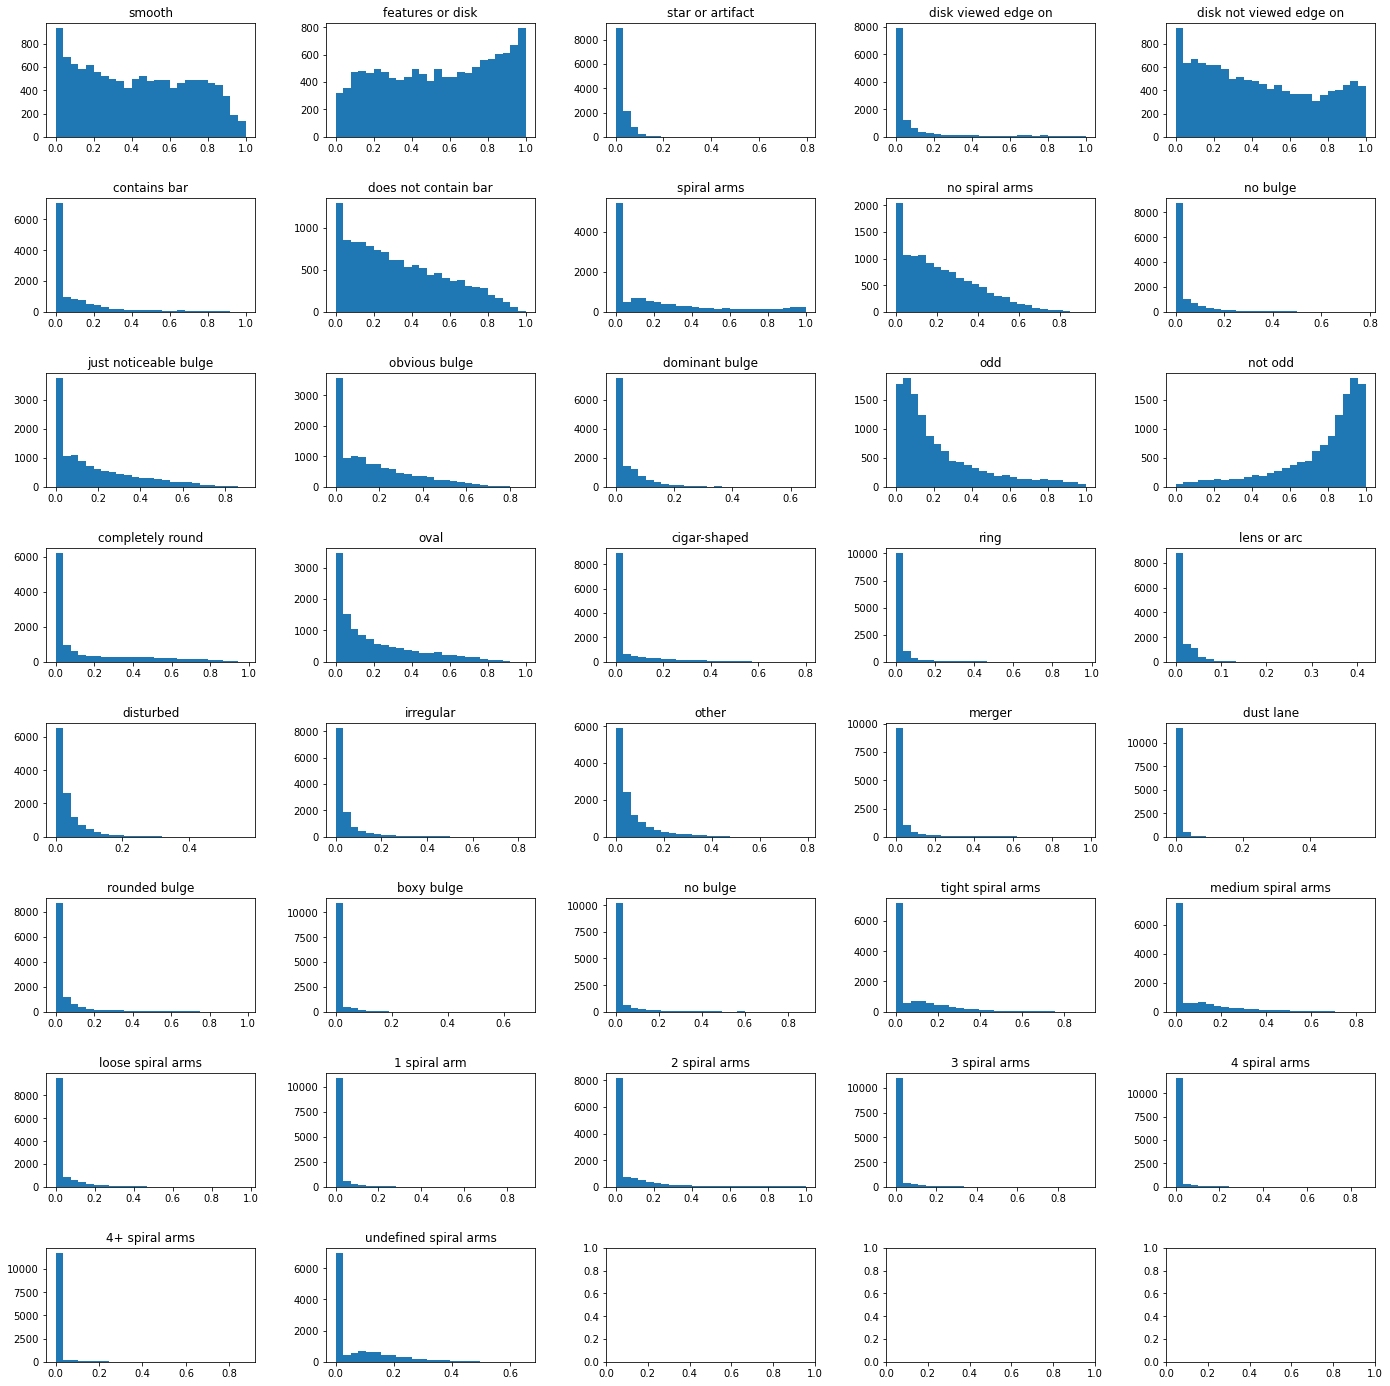

In [21]:
fig, axs = plt.subplots(8, 5)
fig.set_size_inches(20, 20)
fig.tight_layout(pad=4.0)

k = 0
for i in range(8):
    for j in range(5):
        try:
            axs[i,j].hist(label_matrix_test[:,k], bins = 25)
            axs[i,j].set_title(classes[k])

            k += 1
        except:
            print('buh')

## Problem 14 (Crude Guess Model)

In [22]:
#guess is the mean in training set

guess_label = []
for i in range(37):
    mean_i = np.mean(label_matrix_train[:,i])
    
    guess_label.append(mean_i)

In [23]:
#root mean squared error 

#training set
Lmrse = 0 

Ngalaxies = len(label_matrix_train[:,0])
Nlabels = len(label_matrix_train[0,:])

for i in range(Ngalaxies):
    
    for j in range(Nlabels):
        
        Lmrse += (label_matrix_train[i,j] - guess_label[j])**2

Lmrse = np.sqrt(1 / (Ngalaxies*Nlabels) * Lmrse)

print('Lmrse for training set:', Lmrse)

#test set
Lmrse = 0 

Ngalaxies = len(label_matrix_test[:,0])
Nlabels = len(label_matrix_test[0,:])

for i in range(Ngalaxies):
    
    for j in range(Nlabels):
        
        Lmrse += (label_matrix_test[i,j] - guess_label[j])**2

Lmrse = np.sqrt(1 / (Ngalaxies*Nlabels) * Lmrse)

print('Lmrse for test set:', Lmrse)

Lmrse for training set: 0.1638732869846417
Lmrse for test set: 0.1637779392573367


## Problem 15 (implementing CNN)

In [24]:
import datetime, os
from tensorflow.keras import backend as K
import keras

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Activation, BatchNormalization
)

from keras.callbacks import CSVLogger

print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

2022-12-05 10:03:43.881280: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /srv/conda/envs/notebook/lib/python3.9/site-packages/cv2/../../lib64:
2022-12-05 10:03:43.881412: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Num CPUs Available:  1


2022-12-05 10:03:50.628126: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /srv/conda/envs/notebook/lib/python3.9/site-packages/cv2/../../lib64:
2022-12-05 10:03:50.628266: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-05 10:03:50.628352: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-agoh): /proc/driver/nvidia/version does not exist


In [25]:
mygenerator = generator_batches_train_1()

galaxy_imgs, label_vectors = next(mygenerator)

input_shape = np.shape(galaxy_imgs[0])
output_shape = np.shape(label_vectors[0])

In [26]:
#build model

with tf.device('/gpu:0'):

    model = Sequential() 

    model.add(Conv2D(32, (3,3), input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.1))

    model.add(Conv2D(128, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.1))

    model.add(Conv2D(64, (6,6)))
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.1))

    model.add(Flatten())

    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(rate=0.15))
    
    model.add(Dense(40, activation = 'relu'))
    model.add(Dropout(rate=0.15))

    model.add(Dense(output_shape[0]))
    model.add(Activation('sigmoid'))
 

model.summary()

2022-12-05 10:03:50.669661: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 66, 66, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 66, 66, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 66, 66, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 33, 33, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 128)       3

In [27]:
#shuffle data and split
galaxyids = labels_train.get_galaxyids()
galaxyids_shuffle = shuffle(galaxyids, random_state = 32)

galaxyids_train = galaxyids_shuffle[0:math.floor(len(galaxyids_shuffle)*0.8)]
galaxyids_test = galaxyids_shuffle[math.floor(len(galaxyids_shuffle)*0.8):]

def generator_batches_train(num_epochs, batch_size):
    
    for i in range(num_epochs*2):
       
        n1 = 0
        n2 = batch_size

        while len(galaxyids_train[n1:n2]) != 0:

            img1_d_list = []
            label_vectors = []

            for i in galaxyids_train[n1:n2]:          
                img1_d_list.append(downsize_image(str(i)))
                label_vectors.append(labels_train.get_label_vector(i))


            yield np.array(img1_d_list), np.array(label_vectors)

            n1+=batch_size
            n2+=batch_size
        
def generator_batches_test(num_epochs, batch_size):
    
    for i in range(num_epochs*2):
        
        n1 = 0
        n2 = batch_size

        while len(galaxyids_test[n1:n2]) != 0:

            img1_d_list = []
            label_vectors = []

            for i in galaxyids_test[n1:n2]:          
                img1_d_list.append(downsize_image(str(i)))
                label_vectors.append(labels_train.get_label_vector(i))


            yield np.array(img1_d_list), np.array(label_vectors)

            n1+=batch_size
            n2+=batch_size

In [28]:
#set learning rate / compile
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics = ['accuracy'])

In [29]:
num_epochs = 100
batch_size = 64
#steps_per_epoch = math.ceil(len(galaxyids_train)/batch_size)
validation_steps = math.ceil(len(galaxyids_test)/batch_size)

steps_per_epoch = 200


#instantiate generators
mygenerator_train = generator_batches_train(num_epochs, batch_size)
mygenerator_test = generator_batches_test(num_epochs, batch_size)

#reduce learning rate callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,
                              patience=6, min_lr=1e-13, verbose=1, cooldown=0)
#csv logger callback
csv_logger = CSVLogger('log.csv', append=True, separator=';')


'''for i in mygenerator_train:
    galaxy_imgs, label_vectors = i
    model.fit(x = galaxy_imgs.reshape(-1, 79, 79, 3), y = label_vectors, 
                epochs = 10, batch_size = 10, callbacks = [csv_logger, reduce_lr])'''

#loss logger over batches
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy= []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        
loss_history = LossHistory()
        
#save model over epochs
run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
model_path = f'nn_results/datalab_nn_{run_time_string}.h5'
model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)
        
#early stop
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, 
                                             patience=10, \
                                             verbose=1, mode='auto')


In [30]:
#FIT MODEL
'''model.fit(x = mygenerator_train, epochs = num_epochs, steps_per_epoch = steps_per_epoch,
          validation_data = (mygenerator_test), validation_steps = validation_steps,
          callbacks = [csv_logger, reduce_lr, loss_history, earlystop, model_check])'''

'model.fit(x = mygenerator_train, epochs = num_epochs, steps_per_epoch = steps_per_epoch,\n          validation_data = (mygenerator_test), validation_steps = validation_steps,\n          callbacks = [csv_logger, reduce_lr, loss_history, earlystop, model_check])'

In [31]:
#load model for retrain 

model = keras.models.load_model('nn_results/datalab_nn_2022-11-29T00:57.h5')

#view logs

df = pd.read_csv('log.csv', sep = ';')
losses = df['loss']
val_losses = df['val_loss']
epochs = np.linspace(0, len(df['epoch']), len(df['epoch']))
df

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.453047,0.050757,0.573644,0.022405
1,1,0.575078,0.024413,0.633160,0.019591
2,2,0.582187,0.021567,0.647613,0.017514
3,3,0.608043,0.019973,0.669942,0.017128
4,4,0.627266,0.018708,0.678467,0.016591
5,5,0.657969,0.017871,0.678873,0.016545
6,6,0.665859,0.017380,0.701039,0.014910
7,7,0.680566,0.016456,0.710864,0.014729
8,8,0.687266,0.016007,0.717928,0.014134
9,9,0.690781,0.015553,0.719227,0.014033


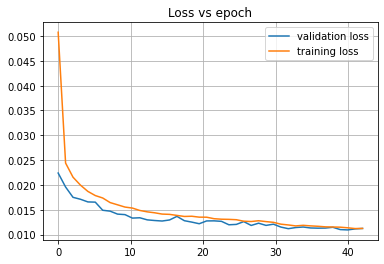

In [32]:

plt.plot(epochs, val_losses, label = 'validation loss')
plt.plot(epochs, losses, label = 'training loss')
plt.title('Loss vs epoch')
plt.grid()
plt.legend()

The CNN consists of 3 convolutional layers with 32, 64, and 128 kernels respectively. The first convolutional layer goes through a batch normalization which normalizes the outputs from -1 to 1 before being passed into a relu activation function, which keeps only positive neurons to turn on. The first 2 convolution layers end with a pooling layer which downsamples the output. Following the convolutional layers are fully connected layers with an output of 102, 88, 64 respectively. After each layer is a dropout function which turns off neurons randomly at a specified percentage, which help fights overfitting.

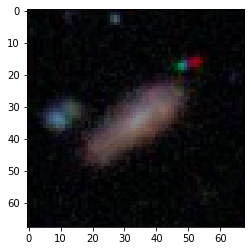

smooth: 0.19144642
features or disk: 0.7897241
star or artifact: 0.012284845
disk viewed edge on: 0.06940764
disk not viewed edge on: 0.72764754
contains bar: 0.17242256
does not contain bar: 0.58149797
spiral arms: 0.47340932
no spiral arms: 0.2796788
no bulge: 0.19246641
just noticeable bulge: 0.40369466
obvious bulge: 0.14366585
dominant bulge: 0.03562805
odd: 0.40133965
not odd: 0.5979113
completely round: 0.018132806
oval: 0.13718653
cigar-shaped: 0.034742087
ring: 0.026386023
lens or arc: 0.010130018
disturbed: 0.08158404
irregular: 0.18363246
other: 0.09976825
merger: 0.05245769
dust lane: 0.0052660406
rounded bulge: 0.03179565
boxy bulge: 0.0028136373
no bulge: 0.028249174
tight spiral arms: 0.19452304
medium spiral arms: 0.21118361
loose spiral arms: 0.1174393
1 spiral arm: 0.0423432
2 spiral arms: 0.20802703
3 spiral arms: 0.036691755
4 spiral arms: 0.014217019
4+ spiral arms: 0.010508567
undefined spiral arms: 0.18628964


In [33]:
#PREDICT

#plot random test data
random_index = random.randint(0,len(galaxyids_test)-1)
galaxy_id = str(galaxyids_test[random_index])

img = downsize_image(galaxy_id)
plt.imshow(img)
plt.show()

#predict

labels = model.predict(img.reshape(-1, 68, 68, 3))

for i in range(len(labels[0])):
    print(classes[i] + ':', labels[0][i])
    


## Problem 16  (model summary)

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 66, 66, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 66, 66, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_12 (Activation)  (None, 66, 66, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 33, 33, 32)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 33, 33, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 31, 31, 128)      

In [35]:
print('trainable params:', 74773)
print('pixels in image:', 68*68)

trainable params: 74773
pixels in image: 4624


## Problem 17 (ResNets)

A ResNet (residual neural network) is a certain nn architecture that utilizes shortcut connections, in which an input can "skip" layers of a network. For every few layers of the network, the output function is the mapping of the layers with an addition of the intial input of the layers. This allows for an identity mapping + a fit for residuals/perturbations of the identity.  

## Problem 18, 19 (Implementing ResNet) + (Reducelr)

In [36]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [37]:
input_t = tf.keras.Input(shape = input_shape)
res_model = ResNet50(include_top = False, weights = None, input_tensor = input_t)

with tf.device('/gpu:0'):
    
    resnet_model_1 = Sequential()
    resnet_model_1.add(res_model)
    resnet_model_1.add(Flatten())
    
    resnet_model_1.add(Dense(200, activation = 'relu'))
    resnet_model_1.add(Dense(100, activation = 'relu'))
    resnet_model_1.add(Dense(output_shape[0]))
    resnet_model_1.add(Activation('sigmoid'))

resnet_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 200)               3686600   
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 37)                3737      
                                                                 
 activation_4 (Activation)   (None, 37)                0         
                                                                 
Total params: 27,298,149
Trainable params: 27,245,029


In [38]:
#set learning rate / compile
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
resnet_model_1.compile(loss='mean_squared_error', optimizer=optimizer, metrics = ['accuracy'])

In [39]:
num_epochs = 100
batch_size = 64
#steps_per_epoch = math.ceil(len(galaxyids_train)/batch_size) 
validation_steps = math.ceil(len(galaxyids_test)/batch_size)

steps_per_epoch = 100


#instantiate generators
mygenerator_train = generator_batches_train(num_epochs, batch_size)
mygenerator_test = generator_batches_test(num_epochs, batch_size)

#reduce learning rate callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,
                              patience=3, min_lr=1e-13, verbose=1, cooldown=0)
#csv logger callback
csv_logger = CSVLogger('resnet1_log.csv', append=True, separator=';')


#loss logger over batches
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy= []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        
loss_history = LossHistory()
        
#save model over epochs
run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
model_path = f'nn_results/datalab_resnet1_{run_time_string}.h5'
model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)
        
#early stop
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, 
                                             patience=8, \
                                             verbose=1, mode='auto')

In [40]:
#FIT RESNET MODEL
'''resnet_model_1.fit(x = mygenerator_train, epochs = num_epochs, steps_per_epoch = steps_per_epoch,
          validation_data = (mygenerator_test), validation_steps = validation_steps,
          callbacks = [csv_logger, reduce_lr, loss_history, earlystop, model_check])'''

'resnet_model_1.fit(x = mygenerator_train, epochs = num_epochs, steps_per_epoch = steps_per_epoch,\n          validation_data = (mygenerator_test), validation_steps = validation_steps,\n          callbacks = [csv_logger, reduce_lr, loss_history, earlystop, model_check])'

In [41]:
#load model for retrain 

#resnet_model_1 = keras.models.load_model('nn_results/datalab_resnet1_2022-12-03T12:34.h5')


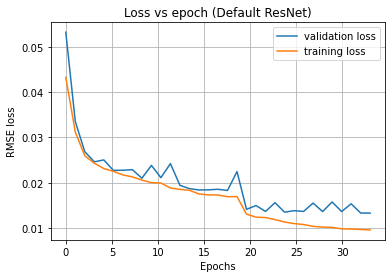

In [42]:
#view logs

df = pd.read_csv('resnet1_log.csv', sep = ';')
losses = df['loss']
val_losses = df['val_loss']
epochs = np.linspace(0, len(df['epoch']), len(df['epoch']))

#plot losses

plt.plot(epochs, val_losses, label = 'validation loss')
plt.plot(epochs, losses, label = 'training loss')
plt.title('Loss vs epoch (Default ResNet)')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('RMSE loss')
plt.legend()

## Problem 20 + 21 (Data augmentation + reweighting)

In [43]:
! pip install imutils

  Using cached imutils-0.5.4-py3-none-any.whl


In [44]:
import imutils

galaxyids = labels_train.get_galaxyids()
galaxyids_shuffle = shuffle(galaxyids, random_state = 32)

galaxyids_train = galaxyids_shuffle[0:math.floor(len(galaxyids_shuffle)*0.8)]
galaxyids_test = galaxyids_shuffle[math.floor(len(galaxyids_shuffle)*0.8):]


def downsize_rotate_image(galaxy_id):
    file_name = 'training_images/training_images/' + galaxy_id + '.jpg'
    
    random_theta = np.random.uniform(low = 0.0, high = 360.0, size = None)
    
    img1_d = np.array(cv2.imread(file_name))
    
    rotated_image = imutils.rotate(img1_d, angle=random_theta)

    rotated_image = rotated_image[90:334, 90:334]
    rotated_image = np.array(cv2.resize(rotated_image, (0, 0), fx = 0.28, fy = 0.28))
    
    return rotated_image


def generator_batches_train_rotate(num_epochs, batch_size):
    
    for i in range(num_epochs*2):
       
        n1 = 0
        n2 = batch_size

        while len(galaxyids_train[n1:n2]) != 0:

            img1_d_list = []
            label_vectors = []

            for i in galaxyids_train[n1:n2]:          
                img1_d_list.append(downsize_rotate_image(str(i)))
                label_vectors.append(labels_train.get_label_vector(i))


            yield np.array(img1_d_list), np.array(label_vectors)

            n1+=batch_size
            n2+=batch_size
        
def generator_batches_test_rotate(num_epochs, batch_size):
    
    for i in range(num_epochs*2):
        
        n1 = 0
        n2 = batch_size

        while len(galaxyids_test[n1:n2]) != 0:

            img1_d_list = []
            label_vectors = []

            for i in galaxyids_test[n1:n2]:          
                img1_d_list.append(downsize_rotate_image(str(i)))
                label_vectors.append(labels_train.get_label_vector(i))


            yield np.array(img1_d_list), np.array(label_vectors)

            n1+=batch_size
            n2+=batch_size

14016


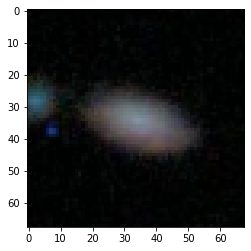

In [45]:
#test rotation 
galaxy_id = '999948'

img = downsize_rotate_image(galaxy_id)

print(sys.getsizeof(img))

plt.imshow(img)
plt.show()

In [46]:
from keras.utils.generic_utils import get_custom_objects

input_t = tf.keras.Input(shape = input_shape)

#res_model = ResNet50(include_top = False, weights = None, input_tensor = input_t)

#reweighting function

epsilon = 1e-12

def custom_activation(outputs):
    
    question_slices = [slice(0, 3), slice(3, 5), slice(5, 7), slice(7, 9), slice(9, 13), slice(13, 15),
                                slice(15, 18), slice(18, 25), slice(25, 28), slice(28, 31), slice(31, 37)]
    
    normalisation_mask = np.zeros((37, 37), dtype='float32')
    for s in question_slices:
        normalisation_mask[s, s] = 1.0
        
    normalisation_denoms = tf.matmul(outputs, tf.convert_to_tensor(normalisation_mask)) + epsilon 
    output_normalised = outputs / normalisation_denoms
    
    '''# First element is a slice indicating the values to be scaled. Second element is an index indicating the scale factor.
    scaling_sequence = [
        (slice(3, 5), 1), #  rescale Q2 (edge on disk or not) by Class1.2 (features or disk)  
        (slice(5, 13), 4), # rescale Q3, Q4, Q5 (bar, spiral arms, bulge questions) by Class2.2 (not edge on disk)
        (slice(15, 18), 0),# rescale Q7 (how round?) by Class1.1 (is it smooth?)
        (slice(18, 25), 13),#rescale Q8 (how is it odd) by Class6.1 (is it odd?)
        (slice(25, 28), 3),# rescale Q9 (bulge?) by Class2.1 (edge-on-disk?)
        (slice(28, 37), 7),# rescale Q10, Q11 (spiral? how many arms) by Class4.1. (is there a spiral?)
    ]'''
    
    one = tf.divide(output_normalised[:,1],output_normalised[:,1])
    
    c1 = output_normalised[:,1]
    c4 = output_normalised[:,4]
    c0 = output_normalised[:,0]
    c13 = output_normalised[:,13]
    c3 = output_normalised[:,3]
    c7 = output_normalised[:,7]
    
    reweight_tensor = tf.stack([one, one, one, c1, c1, c4, c4, c4, c4, c4, c4, c4, c4, one, one, c0, c0, c0, 
                                c13, c13, c13, c13, c13, c13, c13, c3, c3, c3, 
                               c7, c7, c7, c7, c7, c7, c7, c7, c7], axis = 1)
    
    return tf.math.multiply(output_normalised, reweight_tensor)


get_custom_objects().update({'custom_activation': Activation(custom_activation)})
    

with tf.device('/gpu:0'):
    
    resnet_model_2 = Sequential()
    resnet_model_2.add(res_model)
    resnet_model_2.add(Flatten())
    
    resnet_model_2.add(Dense(200, activation = 'relu'))
    resnet_model_2.add(Dense(100, activation = 'relu'))
    resnet_model_2.add(Dense(output_shape[0]))
    resnet_model_2.add(Activation('sigmoid'))
    
    

    #add reweighting 
    
    resnet_model_2.add(Activation(custom_activation, name='Reweight'))

    
print(resnet_model_2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 200)               3686600   
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dense_8 (Dense)             (None, 37)                3737      
                                                                 
 activation_6 (Activation)   (None, 37)                0         
                                                                 
 Reweight (Activation)       (None, 37)               

In [47]:
#set learning rate / compile
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
resnet_model_2.compile(loss='mean_squared_error', optimizer=optimizer, metrics = ['accuracy'])


#testing custom activation
'''random_index = random.randint(0,len(galaxyids_test)-1)
galaxy_id = str(galaxyids_test[random_index])

img = downsize_image(galaxy_id)


labels = resnet_model_2.predict(img.reshape(-1, 68, 68, 3))

for i in range(len(labels[0])):
    print(classes[i] + ':', labels[0][i])'''
    


"random_index = random.randint(0,len(galaxyids_test)-1)\ngalaxy_id = str(galaxyids_test[random_index])\n\nimg = downsize_image(galaxy_id)\n\n\nlabels = resnet_model_2.predict(img.reshape(-1, 68, 68, 3))\n\nfor i in range(len(labels[0])):\n    print(classes[i] + ':', labels[0][i])"

In [48]:
num_epochs = 100
batch_size = 64
#steps_per_epoch = math.ceil(len(galaxyids_train)/batch_size)
validation_steps = math.ceil(len(galaxyids_test)/batch_size)

steps_per_epoch = 100

#instantiate generators
mygenerator_train = generator_batches_train_rotate(num_epochs, batch_size)
mygenerator_test = generator_batches_test_rotate(num_epochs, batch_size)

#reduce learning rate callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.4,
                              patience=4, min_lr=1e-13, verbose=1, cooldown=0)

#csv logger callback
csv_logger = CSVLogger('resnet2_log.csv', append=True, separator=';')


#loss logger over batches
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy= []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        
loss_history = LossHistory()
        
#save model over epochs
run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
model_path = f'nn_results/datalab_resnet2_{run_time_string}.h5'
model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)
        
#early stop
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, 
                                             patience=8, \
                                             verbose=1, mode='auto')

In [ ]:
#FIT RESNET MODEL
'''resnet_model_2.fit(x = mygenerator_train, epochs = num_epochs, steps_per_epoch = steps_per_epoch,
          validation_data = (mygenerator_test), validation_steps = validation_steps,
          callbacks = [csv_logger, reduce_lr, loss_history, earlystop, model_check])'''

In [ ]:
#load model for retrain 

resnet_model_2 = keras.models.load_model('nn_results/datalab_resnet2_2022-12-03T22:58.h5')

In [ ]:
#view logs

df = pd.read_csv('resnet2_log.csv', sep = ';')
losses = df['loss']
val_losses = df['val_loss']
epochs = np.linspace(0, len(df['epoch']), len(df['epoch']))

#plot losses

plt.plot(epochs, val_losses, label = 'validation loss')
plt.plot(epochs, losses, label = 'training loss')
plt.title('Loss vs epoch (Default ResNet)')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('RMSE loss')
plt.legend()